# Understanding video game sale trends
---
#### By Rajat Vemuri & Dimetros Seleshi
# Introduction
---
Video Games have been around for years. It started in 1958 when a physicist created pong. Video games have progressed mightily ever since, and there are many new genres out, and a wide range of player base. People play games such as action, adventure, shooters, platformers and much much more. And over time we can see how the general trends of video game genres has changed, and maybe how critic, and user scores affect these sales over time. In our tutorial we will show how over time the trends of video game genres have changed, how many people play different kinds of games and how user/critic ratings have changed over time. 



# Preliminary
---
We complete the project using these data analytics libraries. 
Scipy, sklearn, pandas, numpy, matplotlib and seaborn. 


In [1]:
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = pd.read_csv('Video_Game.csv')
data['User_Score'] = data['User_Score'] * 10
data = data[data.Year_of_Release.notnull()]

# Omitting video games released in 2017.
data = data.loc[data.Year_of_Release < 2017]

# Converting year of release to integers
data.Year_of_Release = data['Year_of_Release'].astype(int)
data = data.dropna()
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,80.0,324.0,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,83.0,712.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,80.0,193.0,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,89.0,65.0,85.0,433.0,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394,Tom Clancys Splinter Cell,PC,2003,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,91.0,20.0,85.0,291.0,T
17401,Blacksite: Area 51,PC,2007,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,60.0,20.0,49.0,42.0,T
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,65.0,19.0,E
17404,CivCity: Rome,PC,2006,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,67.0,46.0,69.0,32.0,E10+


## The Data
---
The dataset we are using is a large aggregate of notable video games so far. We are extracting the data off a csv, it contains the following data:

name: Name of video game

Platform: the console the video game is played on

Year_of_Release: What year the video game released

Genre: type of video game

Publisher: who made the video game

NA/EU/JP/Other/World_Sales: how many (in millions) did the video game sell in that region

Critic_Score: The average score given to the video game by critics

Critic_Count: The amount of critics that reviewed the video game

User_Score: The average score given to the video game by consumers

User_Count: The amount of user reviews

Rating: The ESRB age rating for the video game





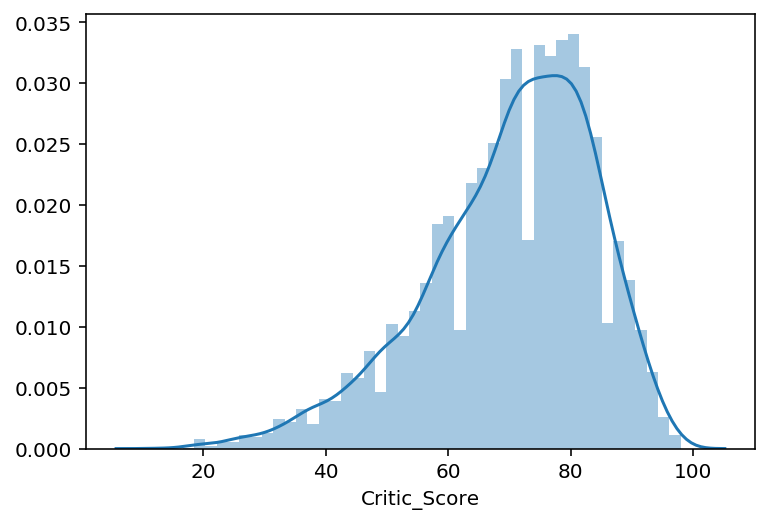

In [3]:
sns.distplot(a=data['Critic_Score'])

### Critic Scores
---
This graph is plotted using seaborn, and shows the critic score, and what the most and least common scores given out to video games are. As we can tell the mode is somewhere around a 78-80%. 


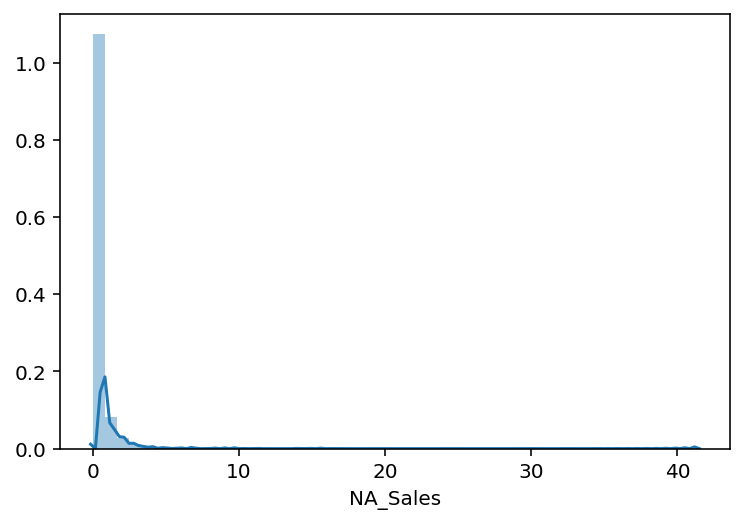

In [4]:
sns.distplot(a=data['NA_Sales'])

## North American Sales
---
This chart is strange, what it is showing that there are only a few games that sell a cut above the rest. Everything else is on roughly the same level. maybe 5% of games get top seller status in North America.

In [5]:
data = data.loc[data.Year_of_Release >= 1991]

# Finding the median sales value by genre and year
Med_Sales_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Global_Sales'])
Med_Sales_by_Gen_and_Yr.columns = Med_Sales_by_Gen_and_Yr.columns.get_level_values(1)
Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.dropna()

Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.drop(Med_Sales_by_Gen_and_Yr.index[0])
Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.drop(Med_Sales_by_Gen_and_Yr.index[0])
Med_Sales_by_Gen_and_Yr = Med_Sales_by_Gen_and_Yr.drop(Med_Sales_by_Gen_and_Yr.index[0])

Med_Sales_by_Gen_and_Yr

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
2003,0.498039,0.142222,0.610690,0.557500,0.531731,0.070000,0.458906,0.747187,0.408095,0.634333,0.620471,0.223704
2004,0.738764,0.251304,0.477879,0.448846,0.639487,0.474286,1.012439,0.807234,0.649859,0.548235,0.787671,0.205652
2005,0.488369,0.223333,0.523929,1.424074,0.385500,1.277857,1.052857,0.410200,0.424607,0.880000,0.532875,0.202941
2006,0.482190,0.253636,0.514194,2.691176,1.427576,0.765000,0.542545,0.508657,0.717273,0.533636,1.435287,0.107333
2007,0.592197,1.396000,0.653043,1.541064,1.006667,0.578000,0.622308,0.622075,0.899868,0.672683,0.851000,0.131538
2008,0.884545,0.170667,1.090690,0.925577,0.767353,0.512857,1.463023,0.733553,0.853281,0.738571,0.711111,0.308182
2009,0.656483,0.204444,0.878438,0.854694,2.133529,0.610625,0.651471,0.651228,0.884444,0.738500,1.414789,0.286071
2010,0.739565,0.515000,0.552273,1.701842,1.822143,0.587778,0.893667,0.767818,1.339636,0.556000,0.993065,0.531053
2011,0.738116,0.531111,0.565833,0.851818,1.116087,0.237500,0.947097,1.116486,1.278816,0.324118,0.674146,0.270417


## Mean Sales per Genre by Year
---

This chart is important. It gives us a yearly listing of average global sales (in millions) of video games by genre. We can explore trends using this chart and understand how over time how the most played genres change. 

We made this chart by dropping columns we didnt need, to calculate this chart we took years, genre and global_sales and aggregrated them to list the mean sales per year by genre. 


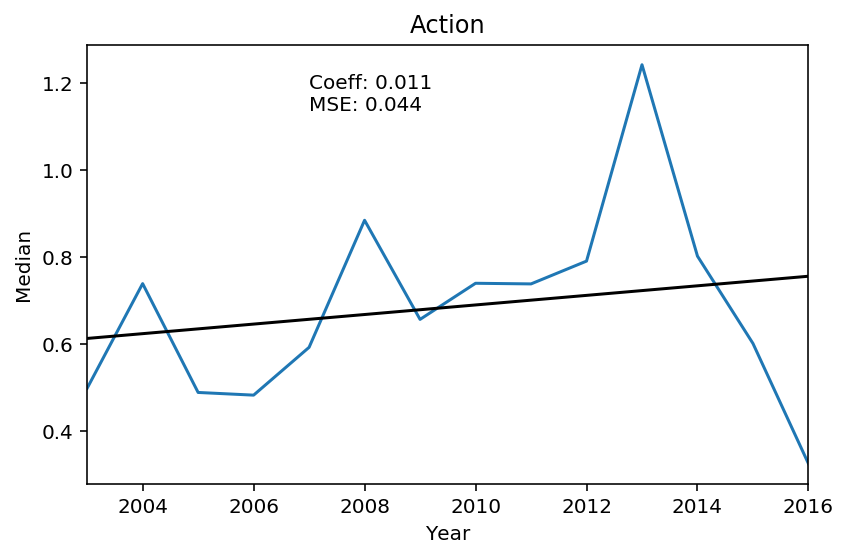

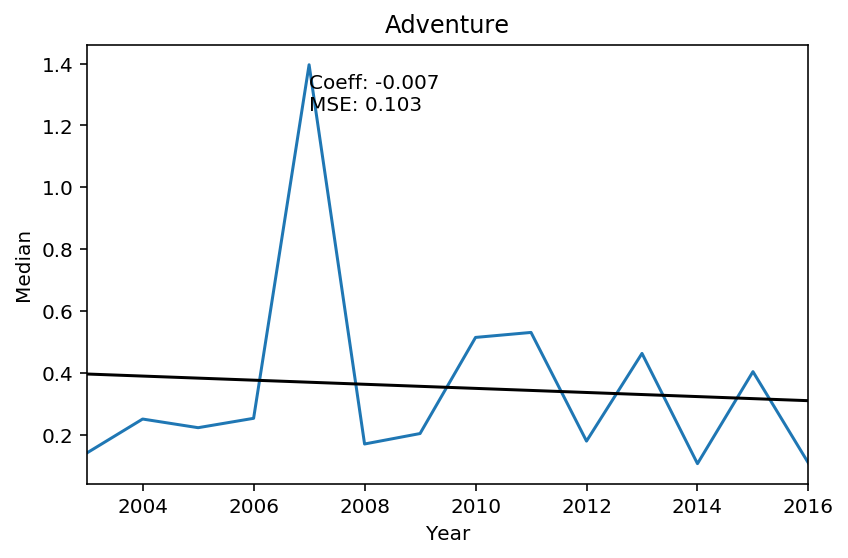

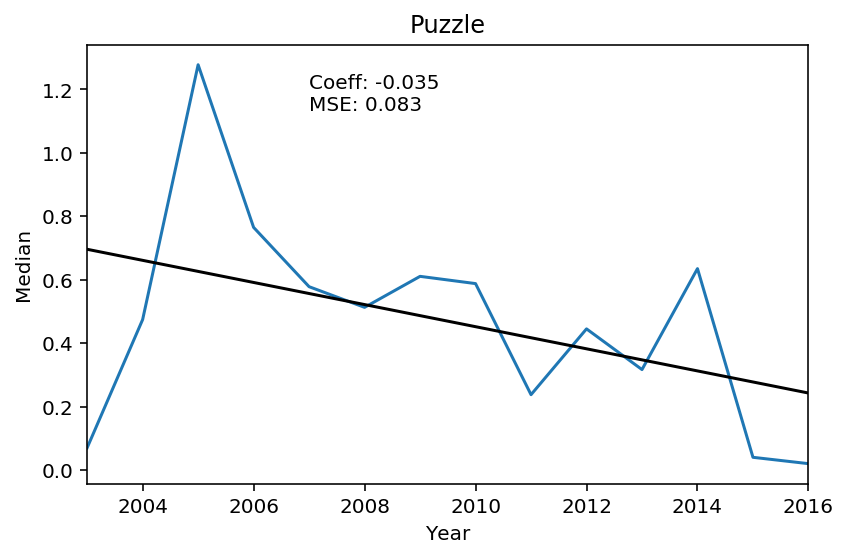

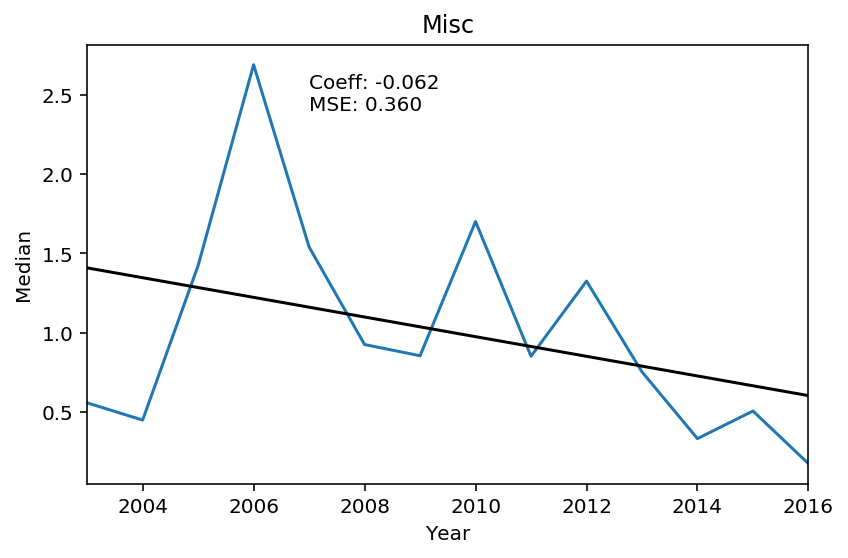

In [6]:
    genre = Med_Sales_by_Gen_and_Yr['Action']
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots()

    x_data = np.transpose(np.matrix(Med_Sales_by_Gen_and_Yr.index))

    count = 0
       
    y_data = genre.to_frame()
    
    # Linear regression
    regr = linear_model.LinearRegression()
    regr.fit(x_data,y_data)
        
    # Mean Squared Error
    MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
    Regr_Coeff.append(regr.coef_[0][0])
    Regr_MSE.append(MSE[0])

    genre.plot(ax=axes)
    axes.plot(x_data,regr.predict(x_data), color='black')

    y_lims = axes.get_ylim()
        
        
    txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
    y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
    axes.text(2007,y_loc,txt)

    axes.set_title('Action')
    axes.set_xlabel('Year')
    axes.set_ylabel('Median')
    count+=1
    fig.tight_layout()
    
    genre = Med_Sales_by_Gen_and_Yr['Adventure']
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots()

    x_data = np.transpose(np.matrix(Med_Sales_by_Gen_and_Yr.index))

    count = 0
    
    
    
    y_data = genre.to_frame()
    
    # Linear regression
    regr = linear_model.LinearRegression()
    regr.fit(x_data,y_data)
        
    # Mean Squared Error
    MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
    Regr_Coeff.append(regr.coef_[0][0])
    Regr_MSE.append(MSE[0])

    genre.plot(ax=axes)
    axes.plot(x_data,regr.predict(x_data), color='black')

    y_lims = axes.get_ylim()
        
        
    txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
    y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
    axes.text(2007,y_loc,txt)

    axes.set_title('Adventure')
    axes.set_xlabel('Year')
    axes.set_ylabel('Median')
    count+=1
    fig.tight_layout()
    
    
    genre = Med_Sales_by_Gen_and_Yr['Puzzle']
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots()

    x_data = np.transpose(np.matrix(Med_Sales_by_Gen_and_Yr.index))

    count = 0
    
    
    
    y_data = genre.to_frame()
    
    # Linear regression
    regr = linear_model.LinearRegression()
    regr.fit(x_data,y_data)
        
    # Mean Squared Error
    MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
    Regr_Coeff.append(regr.coef_[0][0])
    Regr_MSE.append(MSE[0])

    genre.plot(ax=axes)
    axes.plot(x_data,regr.predict(x_data), color='black')

    y_lims = axes.get_ylim()
        
        
    txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
    y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
    axes.text(2007,y_loc,txt)

    axes.set_title('Puzzle')
    axes.set_xlabel('Year')
    axes.set_ylabel('Median')
    count+=1
    fig.tight_layout()
    
    genre = Med_Sales_by_Gen_and_Yr['Misc']
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots()

    x_data = np.transpose(np.matrix(Med_Sales_by_Gen_and_Yr.index))

    count = 0
    
    
    
    y_data = genre.to_frame()
    
    # Linear regression
    regr = linear_model.LinearRegression()
    regr.fit(x_data,y_data)
        
    # Mean Squared Error
    MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
    Regr_Coeff.append(regr.coef_[0][0])
    Regr_MSE.append(MSE[0])

    genre.plot(ax=axes)
    axes.plot(x_data,regr.predict(x_data), color='black')

    y_lims = axes.get_ylim()
        
        
    txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
    y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
    axes.text(2007,y_loc,txt)

    axes.set_title('Misc')
    axes.set_xlabel('Year')
    axes.set_ylabel('Median')
    count+=1
    fig.tight_layout()

## Regression Analysis
---
Here we plot graphs of 4 different genres based on median sales (in millions) against the years. 
What this is showing us, is how trends of different games genres change over the years. The plot represents two things. The blue line is showing the exact means sold per year of that genre, and the black line is a regression line showing the overall trend of sales over the years. 

To do this we use python library numpy for calculations, and python Regression analysis to create a linear regression. Then we use a seaborn plot to plot this data so it is easily read.

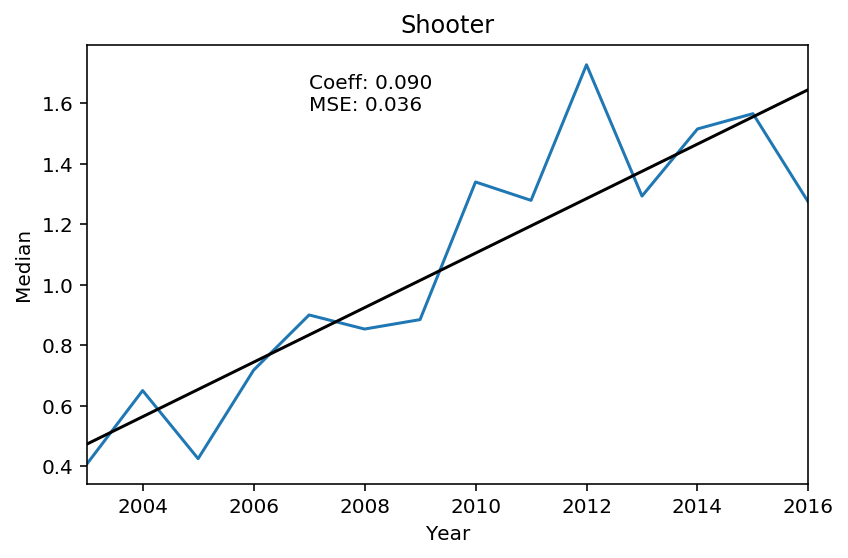

In [7]:
    genre = Med_Sales_by_Gen_and_Yr['Shooter']
    Regr_Coeff = []
    Regr_MSE = []
    fig, axes = plt.subplots()

    x_data = np.transpose(np.matrix(Med_Sales_by_Gen_and_Yr.index))

    count = 0
    
    
    
    y_data = genre.to_frame()
    
    # Linear regression
    regr = linear_model.LinearRegression()
    regr.fit(x_data,y_data)
        
    # Mean Squared Error
    MSE = np.mean((regr.predict(x_data)-y_data)**2)
        
    Regr_Coeff.append(regr.coef_[0][0])
    Regr_MSE.append(MSE[0])

    genre.plot(ax=axes)
    axes.plot(x_data,regr.predict(x_data), color='black')

    y_lims = axes.get_ylim()
        
        
    txt = 'Coeff: %.3f \nMSE: %.3f' % (regr.coef_,MSE)
    y_loc = 0.85*(y_lims[1]-y_lims[0])+y_lims[0]
    axes.text(2007,y_loc,txt)

    axes.set_title('Shooter')
    axes.set_xlabel('Year')
    axes.set_ylabel('Median')
    count+=1
    fig.tight_layout()
    

    


## Shooter Games
---
We would like to point out shooter games, using regressional analysis we can see that this genre experienced the largest growth out of any other genre over the years. This was plotted using the same method as before

In [8]:
Med_Score_by_Gen_and_Yr = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['Critic_Score'])

Med_Score_by_Gen_and_Yr.columns = Med_Score_by_Gen_and_Yr.columns.get_level_values(1)
Med_Score_by_Gen_and_Yr = Med_Score_by_Gen_and_Yr.dropna()

Med_Score_by_Gen_and_Yr

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
2000,64.266667,67.333333,61.888889,75.000000,73.000000,72.000000,71.928571,76.411765,68.900000,76.333333,83.384615,76.166667
2001,67.794118,72.250000,77.181818,66.636364,72.038462,83.333333,69.479167,73.636364,71.964286,77.611111,76.820000,78.250000
2002,69.543210,68.500000,67.794118,55.500000,67.090909,62.333333,68.833333,74.382353,71.590164,76.571429,76.166667,73.000000
2003,67.000000,67.444444,69.965517,66.700000,68.461538,79.000000,67.812500,75.718750,70.333333,78.700000,79.611765,74.555556
2004,67.426966,64.043478,68.212121,65.076923,71.794872,75.000000,70.146341,72.808511,70.281690,67.882353,77.698630,74.043478
2005,69.602837,63.380952,65.321429,67.037037,67.575000,67.500000,70.020408,70.300000,70.651685,73.240000,76.000000,71.529412
2006,64.742857,61.863636,71.096774,71.117647,65.030303,66.200000,68.163636,72.238806,68.618182,66.848485,70.425287,69.333333
2007,60.886364,72.500000,67.565217,63.319149,62.740741,69.880000,66.442308,68.792453,72.421053,69.048780,72.244444,69.769231
2008,66.356643,58.366667,69.965517,64.865385,65.735294,71.857143,66.488372,72.065789,68.546875,66.214286,67.345679,71.954545


## Mean Critic Scores per Genre by Year
---
This is another chart to help us understand what causes reasons for games of different genres to sell differently over time. Here we are looking at how critics rate games of different genres over time to see if there is any correlation. 

We create this chart by using the Critic_Score field of the original graph, and find the mean of all games of that genre per year. 

In [14]:
score_list = []

for genre in Med_Score_by_Gen_and_Yr.columns:
    temp_list = Med_Score_by_Gen_and_Yr[genre].values
    
    sum = 0
    
    for i in temp_list:
        sum += i
        
    score_list.append(int(sum / 17))
    
score_graph = pd.DataFrame({'Genre':Med_Score_by_Gen_and_Yr.columns, 'val':score_list})
score_graph

,Genre,val
0,Action,67
1,Adventure,67
2,Fighting,69
3,Misc,68
4,Platform,71
5,Puzzle,72
6,Racing,70
7,Role-Playing,72
8,Shooter,71
9,Simulation,69


### Averages over all time per genre
Using this data we can understand that genres with higher average ratings sell better than genres with lower rating.

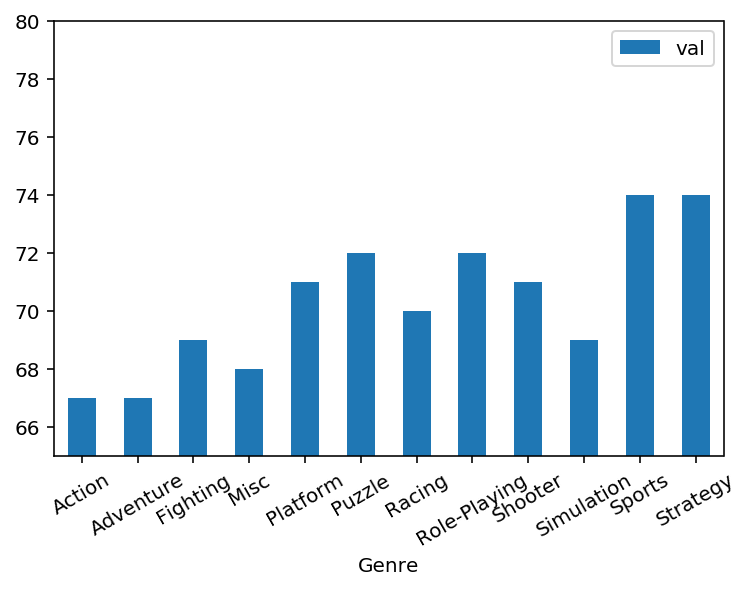

In [15]:
ax = score_graph.plot.bar(x='Genre', y='val', rot=30, ylim=(65,80))

In [16]:

Mean_User = pd.pivot_table(data,index=['Year_of_Release'],
                     columns=['Genre'],values=['User_Score'])

Mean_User.columns = Mean_User.columns.get_level_values(1)
Mean_User = Mean_User.dropna()

Mean_User

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
2000,70.266667,70.000000,71.222222,74.500000,76.125000,63.000000,72.071429,80.941176,76.800000,83.166667,75.000000,85.166667
2001,74.382353,71.625000,82.454545,68.818182,75.307692,80.000000,71.500000,83.863636,73.857143,80.333333,77.160000,83.000000
2002,75.382716,76.458333,74.794118,70.812500,73.848485,69.666667,73.555556,80.676471,76.360656,78.285714,77.500000,81.307692
2003,75.019608,69.777778,78.551724,76.850000,77.211538,93.000000,77.500000,82.937500,75.444444,84.833333,81.917647,83.629630
2004,75.146067,77.826087,76.181818,70.038462,81.256410,82.000000,77.146341,78.361702,75.422535,76.058824,80.863014,79.391304
2005,75.787234,66.952381,73.642857,71.555556,73.950000,69.500000,74.081633,78.760000,75.505618,76.200000,75.325000,79.529412
2006,73.857143,70.136364,75.774194,74.411765,69.151515,69.200000,70.527273,75.686567,73.181818,71.575758,71.563218,70.733333
2007,66.363636,75.900000,72.695652,65.297872,64.222222,71.360000,69.019231,73.339623,73.618421,70.024390,68.044444,67.641026
2008,71.671329,65.200000,71.827586,64.615385,70.382353,75.785714,68.883721,76.302632,69.640625,71.285714,68.074074,68.272727


In [17]:
user_score_list = []

for genre in Mean_User.columns:
    temp_list = Mean_User[genre].values
    
    sum = 0
    
    for i in temp_list:
        sum += i
        
    user_score_list.append(int(sum / 17))
    
user_score_graph = pd.DataFrame({'Genre':Mean_User.columns, 'val':user_score_list})
user_score_graph

,Genre,val
0,Action,70
1,Adventure,72
2,Fighting,72
3,Misc,70
4,Platform,72
5,Puzzle,72
6,Racing,68
7,Role-Playing,76
8,Shooter,70
9,Simulation,70


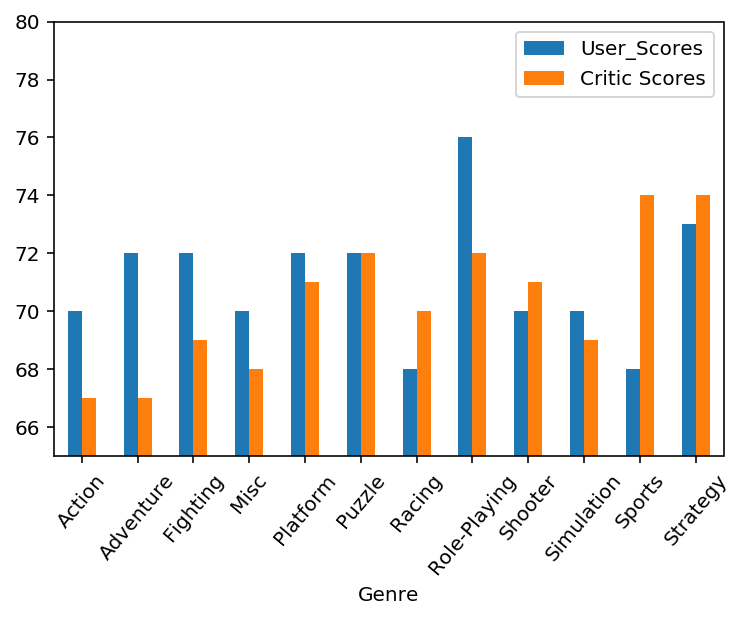

In [18]:
df = pd.DataFrame({'User_Scores': user_score_list, 'Critic Scores': score_list}, index=Mean_User.columns)
ax = df.plot.bar(rot=50, ylim=(65,80))